# Explore `meta-kaggle` Dataset

## --- Test Synthetically Generated Data

We test the potential of our estimation algorithm by synthetically generated data.

In [12]:
# std library
from pprint import pprint
from datetime import datetime, timedelta
from typing import Sequence

# third-party
from matplotlib import pyplot as plt
import numpy as np
from numpy import typing as npt
import pymc as pm
import arviz as az
import pytensor.tensor as pt

# local
import synthetic_data as dgp
import ryvkin_model

### 1. Model Setting

In [ ]:
# Capacities & Total Innovation Uncertainty
## Hour based
param_c_i = 0.15
param_c_j = 0.15
param_sigma = 1.0

# Contest related
param_theta = 1

# Signal Precision
param_lambda = 1

# Intensity-Effort Ratio
param_r = 5

# Contest Time Duaration
time_step = 1 / 24
start_time = datetime(2025, 1, 1, 0, 0, 0)
end_time = datetime(2025, 4, 1, 0, 0, 0)
contest_days = (end_time - start_time).days
contest_seconds = int((end_time - start_time).total_seconds())
contest_hours = int(contest_seconds / 3600)
contest_timegrids = np.arange(start_time, end_time, \
		timedelta(hours=1), dtype=np.datetime64)

print(contest_days, contest_hours, len(contest_timegrids))

90 2160 2160


### 2. Simulations

In [ ]:
time_grids, i_effort_dynamic, j_effort_dynamic, \
real_gap_dynamic, perceived_gap_dynamic, observed_gap_dynamic, \
i_submission_events, j_submission_events = dgp.synthetic_data_simulation(
	c_i=param_c_i,
	c_j=param_c_j,
	theta=param_theta,
	sigma=param_sigma,
	lamb=param_lambda,
	r=param_r,
	hour_arrival_ub=1,
	start_time=start_time,
	end_time=end_time,
	time_unit=timedelta(hours=1),
	time_unit_2f=time_step
)

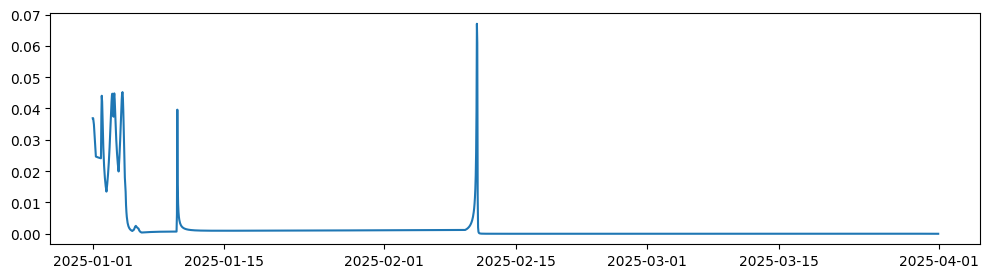

In [4]:
plt.figure(figsize=(12, 3))
plt.plot(time_grids, i_effort_dynamic)
plt.show()

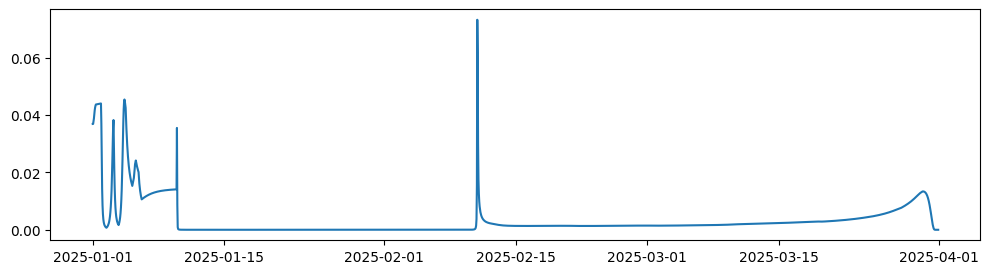

In [5]:
plt.figure(figsize=(12, 3))
plt.plot(time_grids, j_effort_dynamic)
plt.show()

In [ ]:
def plot_ts_events(
		time_grids: Sequence[datetime] | npt.NDArray[np.datetime64],
		ts: dict[str, Sequence | npt.NDArray],
		events: dict[str, Sequence | npt.NDArray],
		*,
		figsize=(10, 5),
		height_ratios=[3, 1],
):
	fig, (ax_main, ax_events) = plt.subplots(
		nrows=2, ncols=1, figsize=figsize, height_ratios=height_ratios
	)
	# plot time series
	for ts_key, ts_val in ts.items():
		ax_main.plot(time_grids, ts_val, label=ts_key)
	ax_main.legend()
	xrange = ax_main.get_xlim()
	# plot events
	event_height = 0.2
	ytick = 0
	yticks = []
	yticklabels = []
	for event_key, event_val in events.items():
		yticks.append(ytick)
		yticklabels.append(event_key)
		ax_events.hlines(y=ytick, xmin=xrange[0], xmax=xrange[1])
		ax_events.vlines(x=event_val, ymin=ytick - event_height, ymax=ytick + event_height)
		ytick -= 2.5 * event_height
	ax_events.set_xlim(xrange)
	ax_events.get_xaxis().set_visible(False)
	ax_events.set_yticks(yticks)
	ax_events.set_yticklabels(yticklabels)
	return fig, ax_main, ax_events

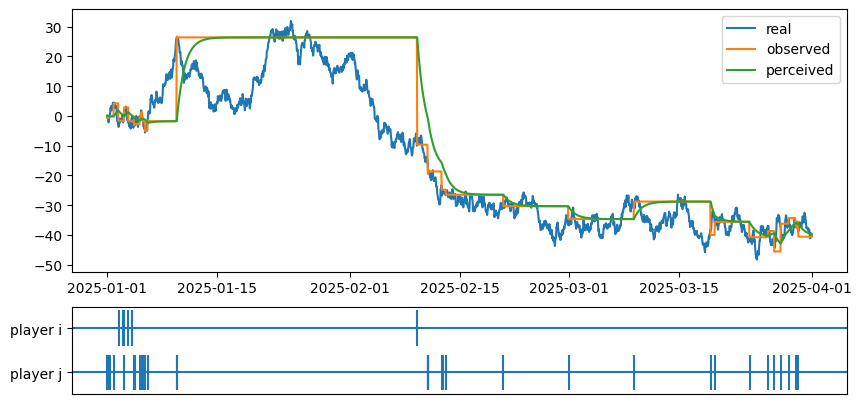

In [ ]:
fig, _, _ = plot_ts_events(time_grids, {
			'real': real_gap_dynamic,
			'observed': observed_gap_dynamic,
			'perceived': perceived_gap_dynamic,
		}, {
			'player i': i_submission_events,
			'player j': j_submission_events,
	})

### 3. Bayesian Inference

In [ ]:
# datatsets
## observed_gap_dynamic
## i_submission_events, j_submission_events

with pm.Model() as model:
	# priors
	c_i = pm.Gamma('c_i', alpha=1, beta=1)
	c_j = pm.Gamma('c_j', alpha=1, beta=1)
	sigma = pm.Gamma('sigma', alphs=1, beta=1)
	r = pm.Gamma('r', alpha=5, beta=1)
	lamb = pm.Gamma('lambda', alpha=1, beta=1)

	# calculate sequences of m_i and m_j
	tilde_y = 0
	for idx_time, (time, shock, noise) in enumerate(zip(time_grids, innovation_shocks, signal_noises)):
		q_i, q_j = ryvkin_model.get_equilibrium_efforts(

		)